<a href="https://colab.research.google.com/github/shaon11579/VAE-2021-/blob/main/R_in_google_colab%20TEST%202%20with%20latent%20var%201_30_32_sept%2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Library used 

In [27]:
install.packages("tfprobability")
library(tfprobability)
library(tensorflow)
install.packages("devtools")
install.packages("usethis")
library(usethis)
install.packages("mvtnorm")
library(mvtnorm)
install.packages("CDM")
library(devtools)
library(keras)
library(CDM)
install.packages("ML2Pvae")
library(ML2Pvae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# build_vae_independent() assumes that each of the latent abilities are independent of one another.

# 1 latent ability 30 items 

In [2]:
qqm <- read.csv("/content/saved results /Qmat2_30_1.csv")
data <- read.csv("/content/saved results /Qmat2_subset30.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/saved results /Qmat2_30_1.csv'”


In [3]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [5]:
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


In [6]:
summary(data)

       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

In [7]:
str(data)

 int [1:4199, 1:30] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "V1" "V2" "V3" "V4" ...


In [8]:
head(Q)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0


In [9]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [10]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 1)         9        hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 1)         9        hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 1)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      60          
Total params: 60
Trainable params: 60
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 1), (None, 1), (None, 1 650         
________________________________________________________________________________
model_1 (Functional)                (None, 30)                      60          
Total params: 710
Trainable params: 710
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Model 2: An ML2P-VAE model assuming correlation among traits is known
cov <- as.matrix(correlation_matrix) 
models_cor <- build_vae_correlated(num_items,
                                    num_skills,
                                              Q,
                                               model_type = 2,
                                               mean_vector = means,
                                               covariance_matrix = cov,
                                               enc_hid_arch = enc_arch,
                                                hid_enc_activations = enc_act,
                                                output_activation = out_act,
                                                kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor

ERROR: ignored

In [11]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

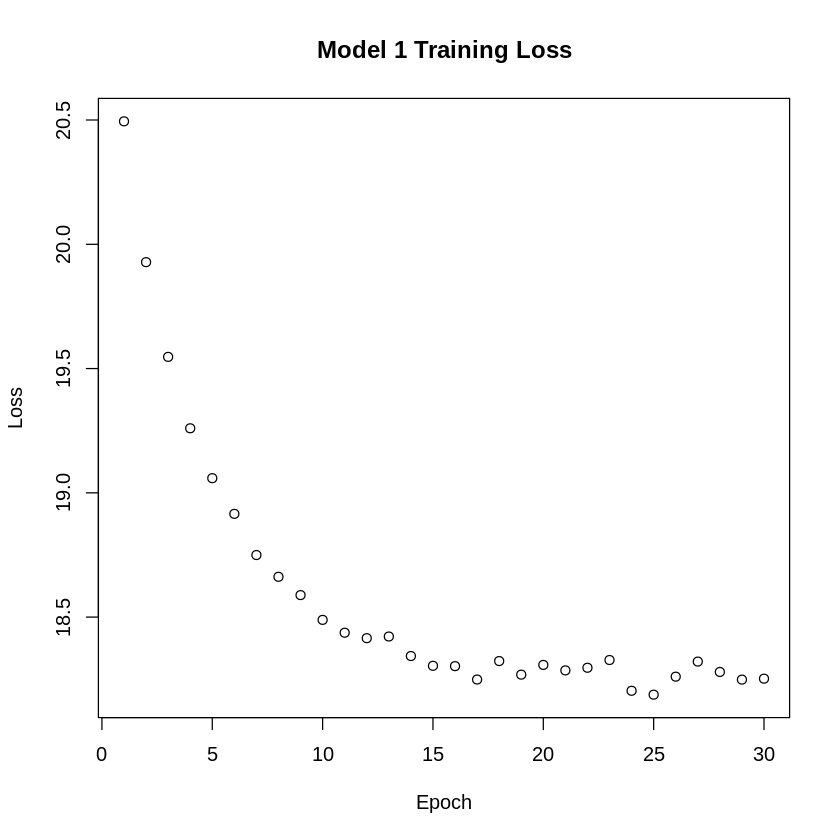

In [12]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [23]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [25]:
### save results

write.csv(disc_est_ind,"/content/SR/disc_est_ind.csv")
write.csv(diff_est_ind,"/content/SR/diff_est_ind.csv")
write.csv(all_theta_est_ind,"/content/SR/all_theta_est_ind.csv")
# write.csv(diff_estimates, file=paste('.\\results\\csv\\4_skills\\vae_ind_diff_', num_skills, 'skills.csv', sep=''))
# write.csv(all_skill_preds, file=paste('.\\results\\csv\\4_skills\\vae_ind_theta_', num_skills, 'skills.csv', sep=''))


In [ ]:
# corr test of true and predocted values 
true<- data
predict<- read.csv("/Q-mat/all_theta_est_indU.csv")
View(predict)
cor.test(true,predict, method = "pearson")

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.003505725,-0.018192591,-0.028315883,0.011867680,-0.015792463,-0.46746349,0.004939117,-0.023736365,0.001932310,0.005369924,⋯,0.000807307,-0.000761157,0.007032151,-0.080230460,0.000974841,-0.036669470,0.004434501,-0.005843597,0.001724049,-0.035009824
0.006214445,0.008848954,0.007489592,0.000323908,0.011424337,0.28653026,0.000335631,0.014786325,0.005973737,-0.005681206,⋯,-0.002657152,-0.000170102,0.001905174,0.052485585,0.000075000,0.023495466,-0.004429388,0.005461073,0.042887196,0.021000303
-0.001448892,0.005460411,-0.041554578,0.006923411,0.008765306,-0.81034058,-0.005615282,-0.029672522,0.000554031,-0.008406911,⋯,0.008943302,-0.000591783,-0.015552523,-0.117891379,0.000662577,-0.008810751,-0.006764532,-0.010087162,0.003677949,-0.045157786
-0.012341371,-0.003838733,-0.027757138,-0.003683243,-0.008919336,-1.17031086,-0.005009486,-0.017043330,-0.016664496,0.003071245,⋯,0.008149807,0.000009460,-0.005460058,-0.139908150,-0.000038800,0.001960572,0.003851317,-0.012378345,-0.007563770,-0.061100353
-0.000424847,0.006022427,0.019760743,0.000762036,0.005208179,0.51696754,0.000762879,0.014986686,0.008980233,-0.011092849,⋯,-0.010793032,0.000005520,0.002620840,0.076554760,-0.000105176,-0.007587824,-0.003702203,0.014721919,0.028485209,0.045429152
-0.002288613,0.006175540,-0.007551149,0.005327122,-0.001649760,0.53878397,0.003178819,0.000256799,0.012051555,-0.000915643,⋯,-0.000646349,-0.000310247,-0.010317559,0.073116288,0.000261615,-0.000358123,-0.004281330,-0.001413550,0.050012216,0.002716448
-0.008688290,-0.005364630,-0.011835128,0.003900183,-0.029405430,0.48195213,0.002891439,0.010328785,-0.001489231,0.009132719,⋯,0.000088000,0.000079200,0.008046224,0.121523842,-0.000130682,0.031173170,0.009757198,-0.001118103,0.057125270,0.012302749
-0.013591809,-0.012004301,0.009232283,-0.006292924,-0.007362913,-0.35521138,0.000982400,0.002885871,-0.003099102,-0.000190541,⋯,-0.016106423,0.000094700,-0.005240849,-0.089564979,-0.000123200,-0.074773863,-0.001808485,0.001512498,-0.103815243,-0.010047497
-0.007317318,-0.001957711,-0.042461924,0.003346235,0.004854023,-1.41043139,-0.005207409,-0.038222101,-0.008088532,-0.003710262,⋯,0.010783652,-0.000538109,-0.014732453,-0.211274937,0.000630614,-0.026504532,-0.003660080,-0.015043887,-0.016245395,-0.079168558


ERROR: ignored

In [19]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [26]:
write.csv(disc_true,"/content/SR/disc_true.csv")
write.csv(diff_true,"/content/SR/diff_true.csv")
write.csv(theta_true,"/content/SR/theta_true.csv")

In [ ]:
# rmse score 



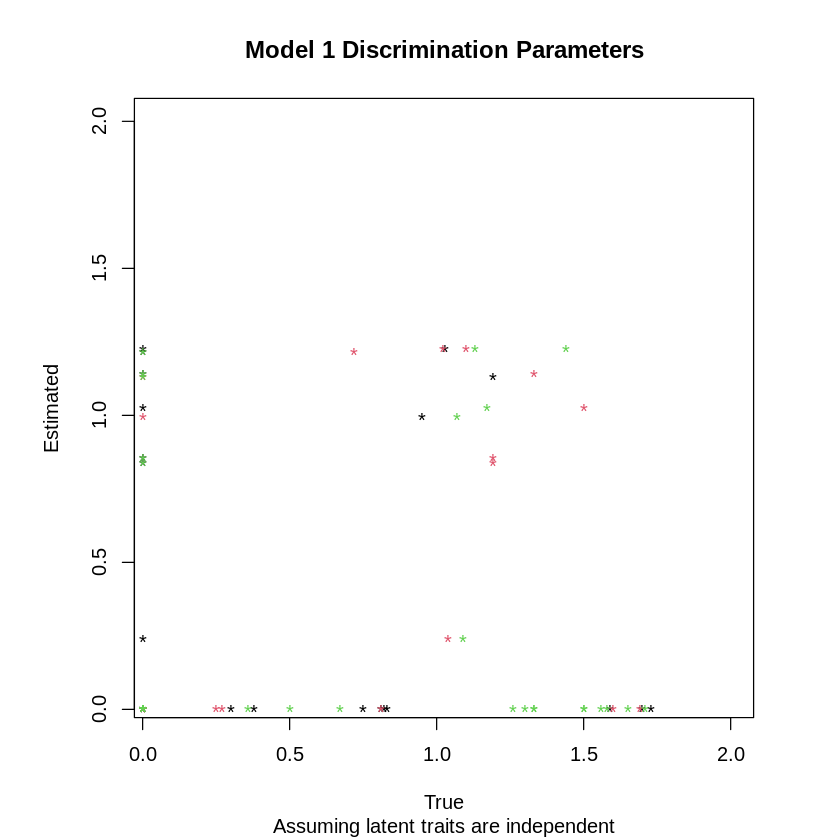

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


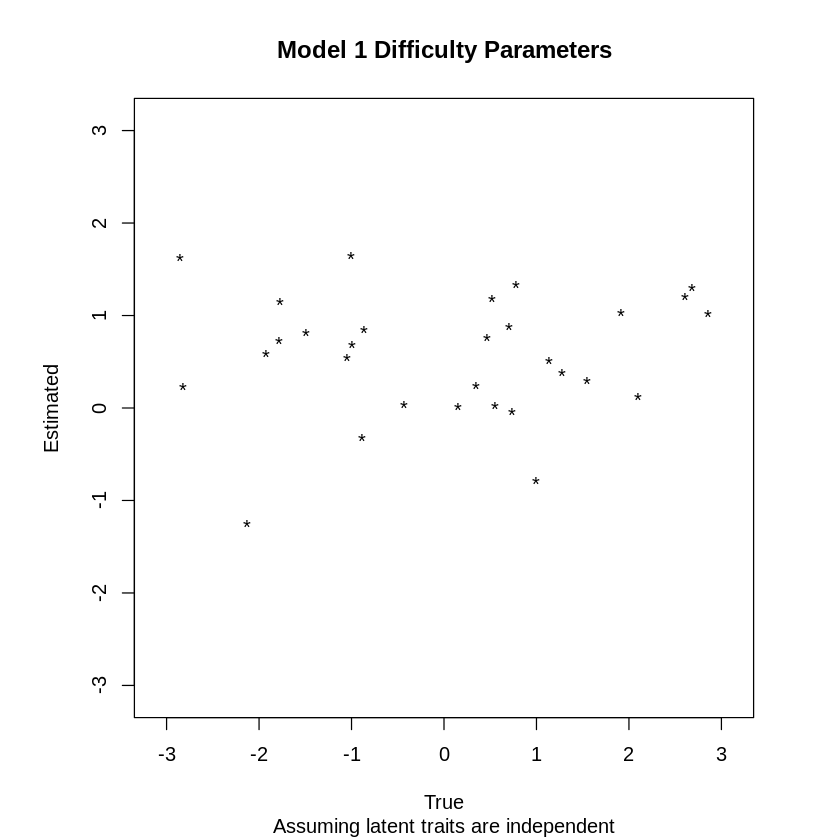

In [ ]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

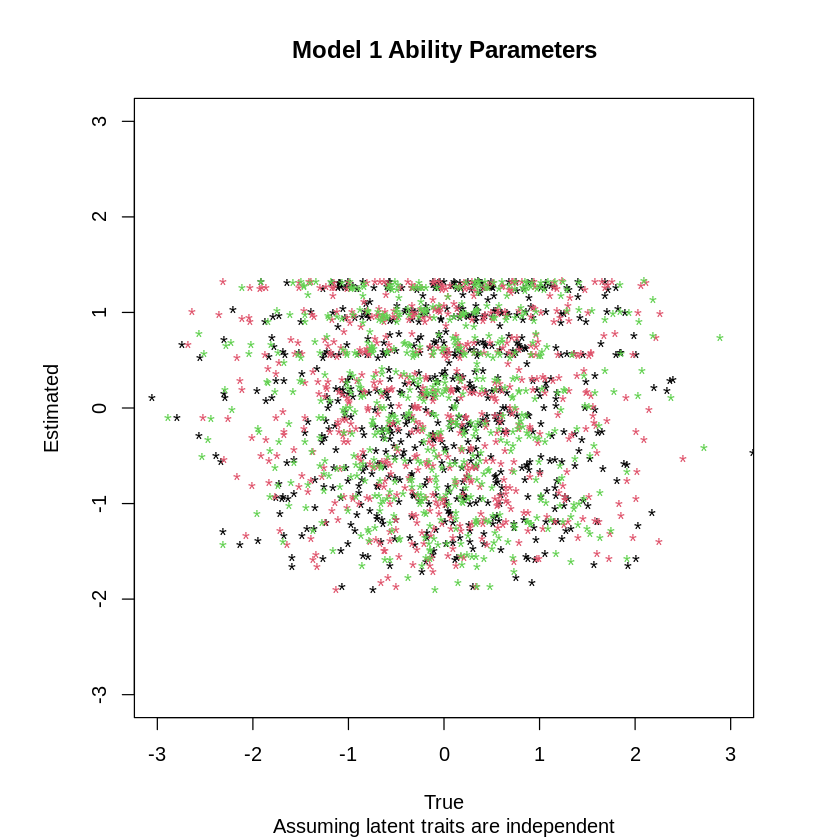

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

# 30 latent skills and 30 items 

In [29]:
qqm1 <- read.csv("/content/saved results /Qmat2_30.csv")
data1 <- read.csv("/content/saved results /Qmat2_subset30.csv")

In [30]:
head(qqm1)
head(data1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
3,1,1,1,1,0,1,0,0,1,0,⋯,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,1
6,1,0,1,1,1,1,1,1,1,1,⋯,0,1,1,1,1,1,0,1,1,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
3,0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
5,1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
6,1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


In [31]:
# Load data
data <- as.matrix(data1)
Q <- as.matrix(qqm1)

In [32]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [33]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_3"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 30)        270      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 30)        270      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 30)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      930         
Total params: 930
Trainable params: 930
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_3 (Functional)                [(None, 30), (None, 30), (None, 1172        
________________________________________________________________________________
model_4 (Functional)                (None, 30)                      930         
Total params: 2,102
Trainable params: 2,102
Non-trainable params: 0
________________________________________________________________________________



In [34]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

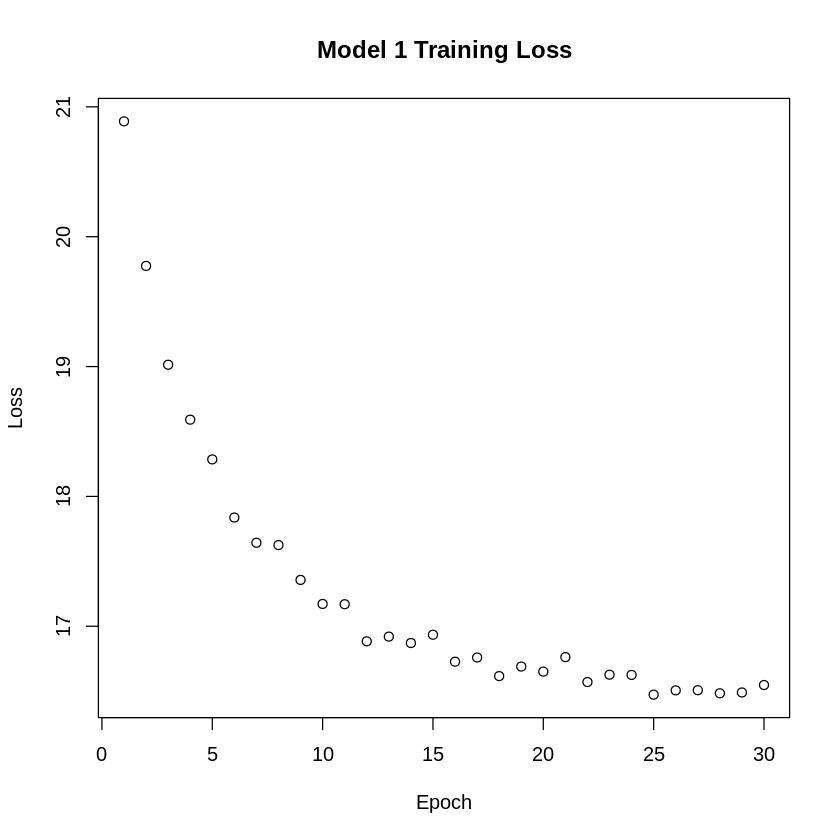

In [35]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [36]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [37]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [42]:

write.csv(disc_est_ind,"/content/30lb/disc_est_ind.csv")
write.csv(diff_est_ind,"/content/30lb/diff_est_ind.csv")
write.csv(all_theta_est_ind,"/content/30lb/all_theta_est_ind.csv")

In [43]:
write.csv(disc_true,"/content/30lb/disc_true.csv")
write.csv(diff_true,"/content/30lb/diff_true.csv")
write.csv(theta_true,"/content/30lb/theta_true.csv")

In [58]:
# rmse score 
install.packages("Metrics")
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
est<- read.csv("/content/30lb/all_theta_est_indF.csv")
true<- read.csv("/content/saved results /Qmat2_subset30.csv")
est=as.numeric("est")
true= as.numeric("true")

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [65]:
# Calculating RMSE using rmse()         
result = rmse(true, est)
summary(result)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     NA      NA      NA     NaN      NA      NA       1 

In [57]:
cor.test(true,est)

ERROR: ignored

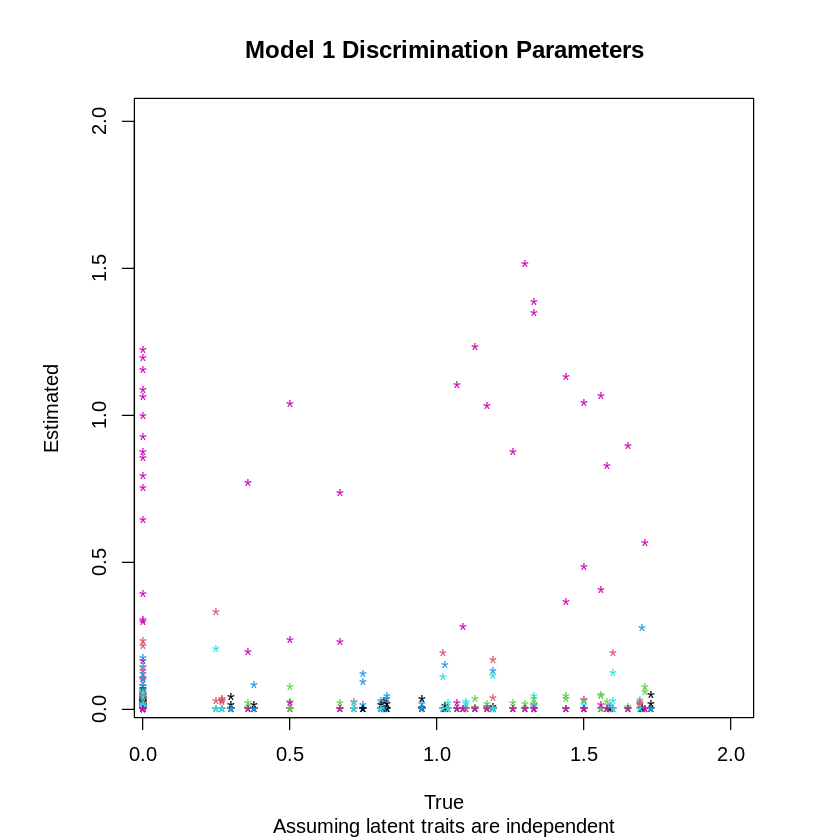

In [38]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

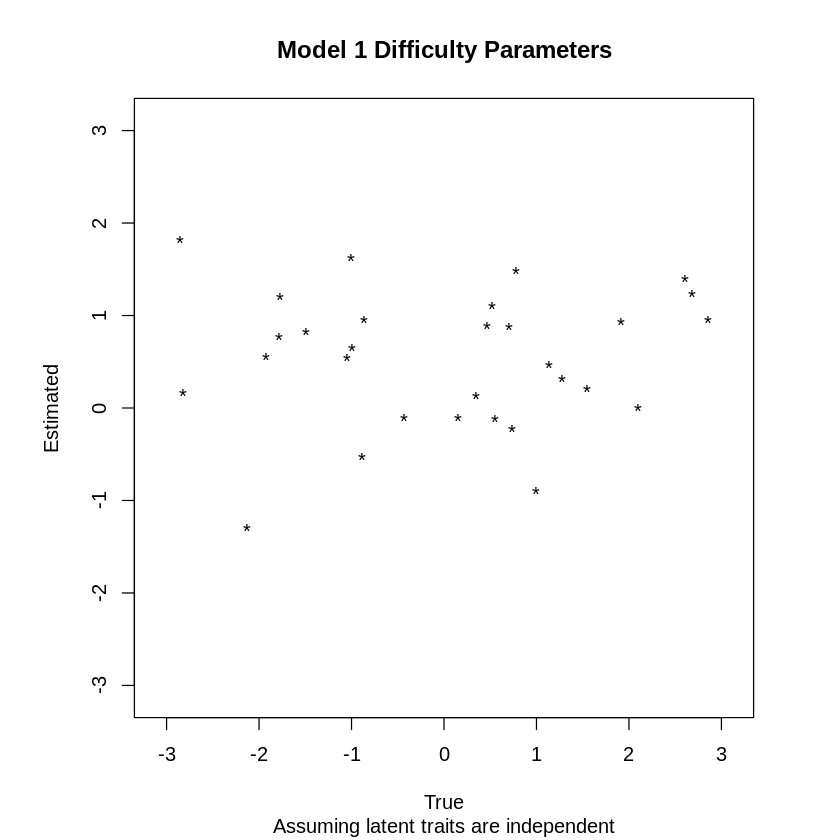

In [39]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

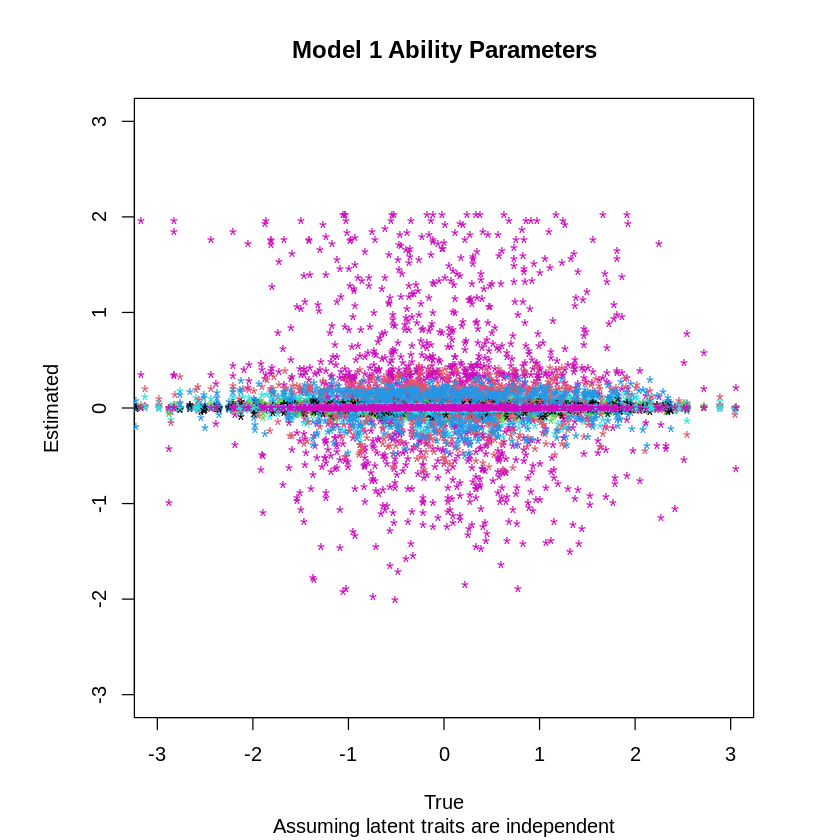

In [41]:
# Ability Parameters
par(pty="s")
matplot(theta_true[2200:2800,],
        all_theta_est_ind[2200:2800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

# **32 latent abilities**

In [ ]:
qqm2 <- read.csv("/Q-mat/Qmat2_32.csv")
data2 <- read.csv("/Q-mat/Qmat2_subset32.csv")

In [ ]:
# Load data
data <- as.matrix(data2)
Q <- as.matrix(qqm2)

In [ ]:
head(data)
head(Q)
summary(data)
str(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,1,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,1,0,0,0,⋯,0,1,1,0,0,0,1,0,1,1
1,1,0,0,0,0,0,1,1,1,⋯,1,1,1,1,1,0,0,0,0,1
1,1,1,0,1,1,0,0,1,1,⋯,1,0,1,1,0,1,1,1,1,1


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,0,0,0,1,0,1,1,0,0,⋯,0,1,1,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,0,⋯,1,0,0,0,1,0,0,1,1,0
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,1,0,0
1,0,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,1,1,0,1,1


       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

 int [1:4199, 1:32] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:32] "V1" "V2" "V3" "V4" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_3"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 32)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        528      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 32)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 32)                      1056        
Total params: 1,056
Trainable params: 1,056
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 32)]                    0           
________________________________________________________________________________
model_3 (Functional)                [(None, 32), (None, 32), (None, 1240        
________________________________________________________________________________
model_4 (Functional)                (None, 32)                      1056        
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

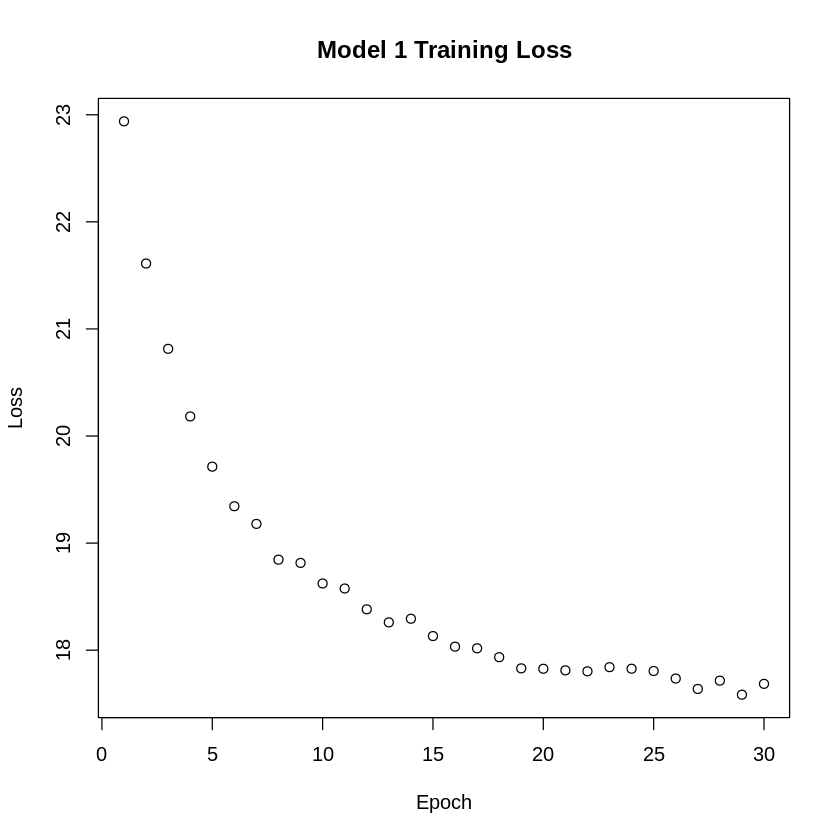

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [ ]:
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

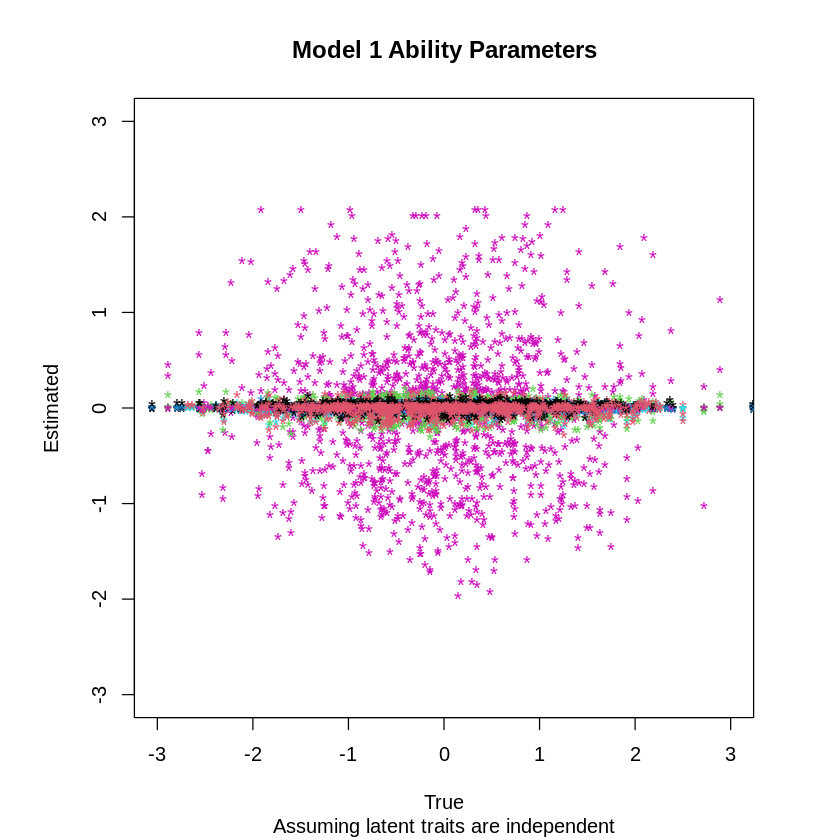

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm3 <- read.csv("/content/sample_data/Qmat2_sp_3c.csv")
data3 <- read.csv("/content/sample_data/Qmat2_subset_sp.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/sample_data/Qmat2_sp_3c.csv'”


In [ ]:
# Load data
data <- as.matrix(data3)
Q <- as.matrix(qqm3)

In [ ]:
head(data)
str(data)
head(Q)
str(Q)

MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


 int [1:4199, 1:30] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
1,1,1,1,0,1,0,0,1,0,⋯,0,0,1,0,0,0,1,0,0,1


 int [1:3, 1:30] 0 0 1 0 0 1 0 0 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_9"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_10"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      120         
Total params: 120
Trainable params: 120
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_11"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_9 (Functional)                [(None, 3), (None, 3), (None, 3 686         
________________________________________________________________________________
model_10 (Functional)               (None, 30)                      120         
Total params: 806
Trainable params: 806
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

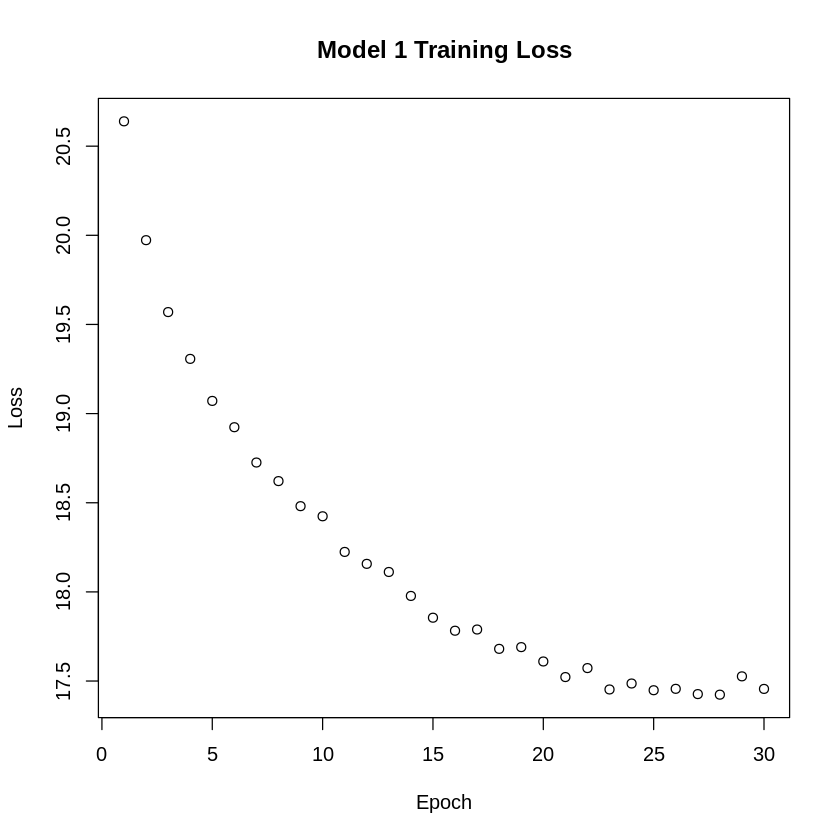

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

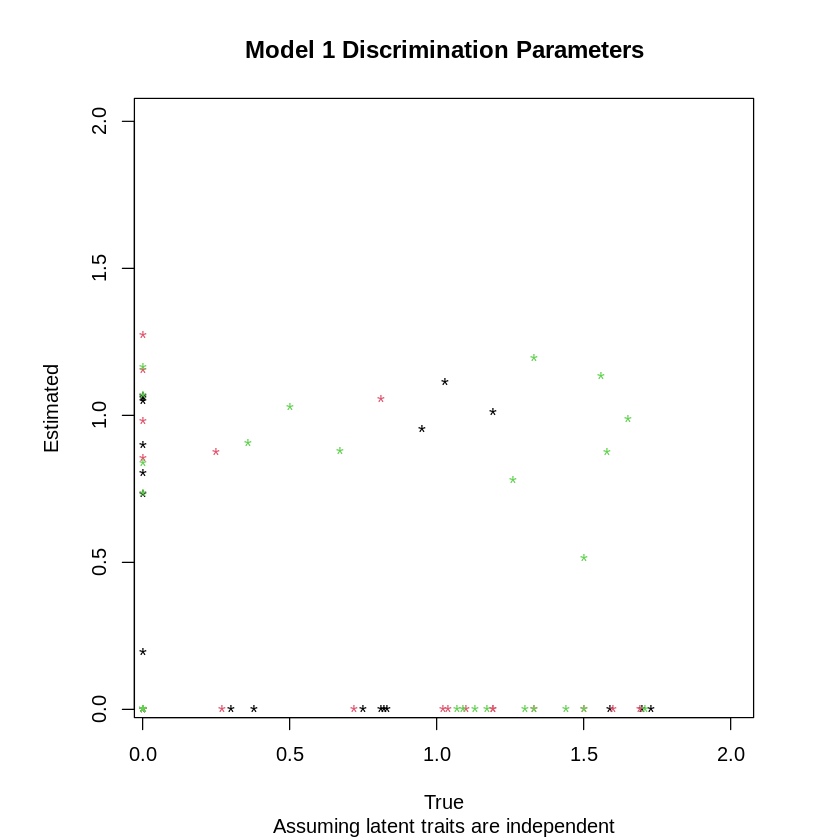

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

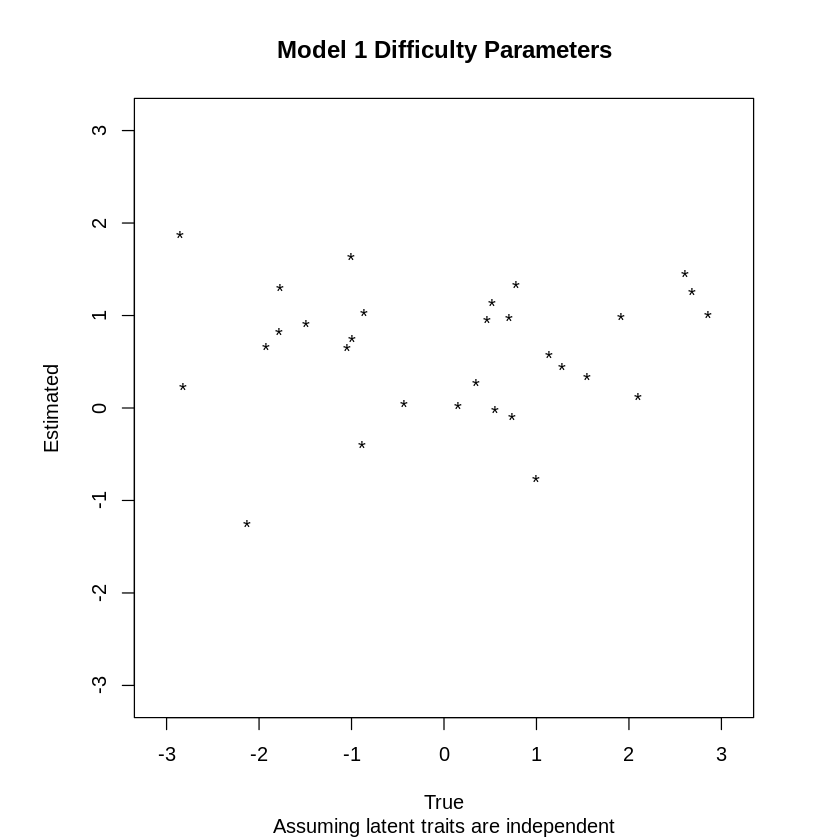

In [ ]:
# Difficulty parameter 
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

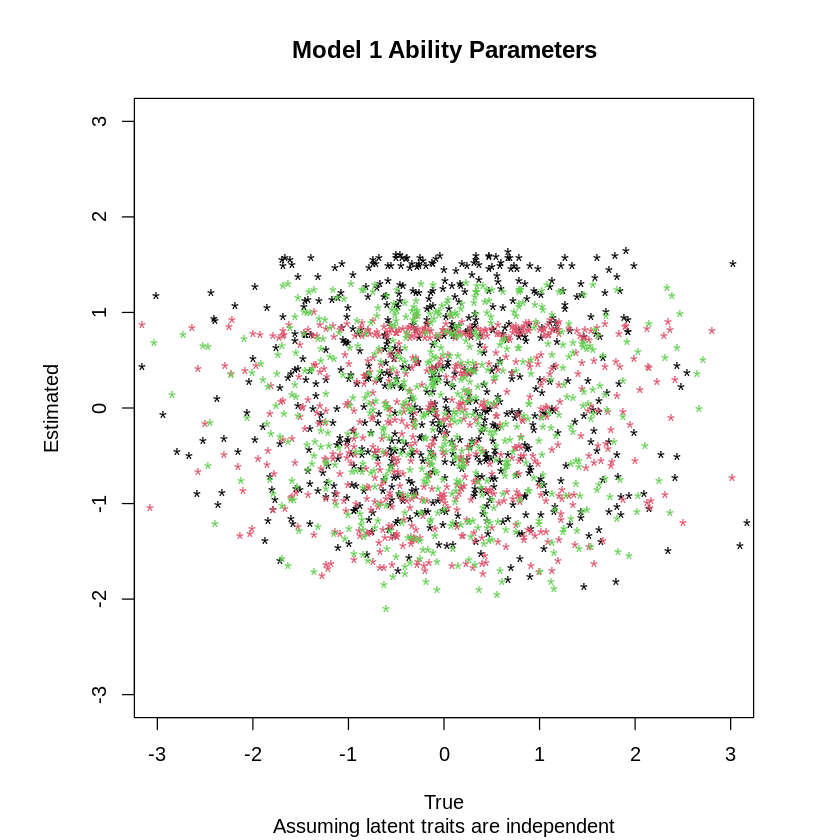

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[1200:1800,],
        all_theta_est_ind[1200:1800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm3 <- read.csv("/bin/qmat/Qmat2_sp_3c.csv")
data3 <- read.csv("/bin/qmat/Qmat2_subset_sp.csv")

Warning message in file(file, "rt"):
“cannot open file '/bin/qmat/Qmat2_sp_3c.csv': No such file or directory”


ERROR: ignored

In [ ]:
# Load data
data <- as.matrix(data3)
Q <- as.matrix(qqm3)

In [ ]:
head(data3)
summary(data3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
3,0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
5,1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
6,1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

In [ ]:
str(Q)


 int [1:3, 1:30] 0 0 1 0 0 1 0 0 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "V1" "V2" "V3" "V4" ...


In [ ]:
summary(Q)

       V1               V2               V3               V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10        

In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_12"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        1984     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         99       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         99       hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_13"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      120         
Total params: 120
Trainable params: 120
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_14"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_12 (Functional)               [(None, 3), (None, 3), (None, 3 4262        
________________________________________________________________________________
model_13 (Functional)               (None, 30)                      120         
Total params: 4,382
Trainable params: 4,382
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 10
batch_size <- 1

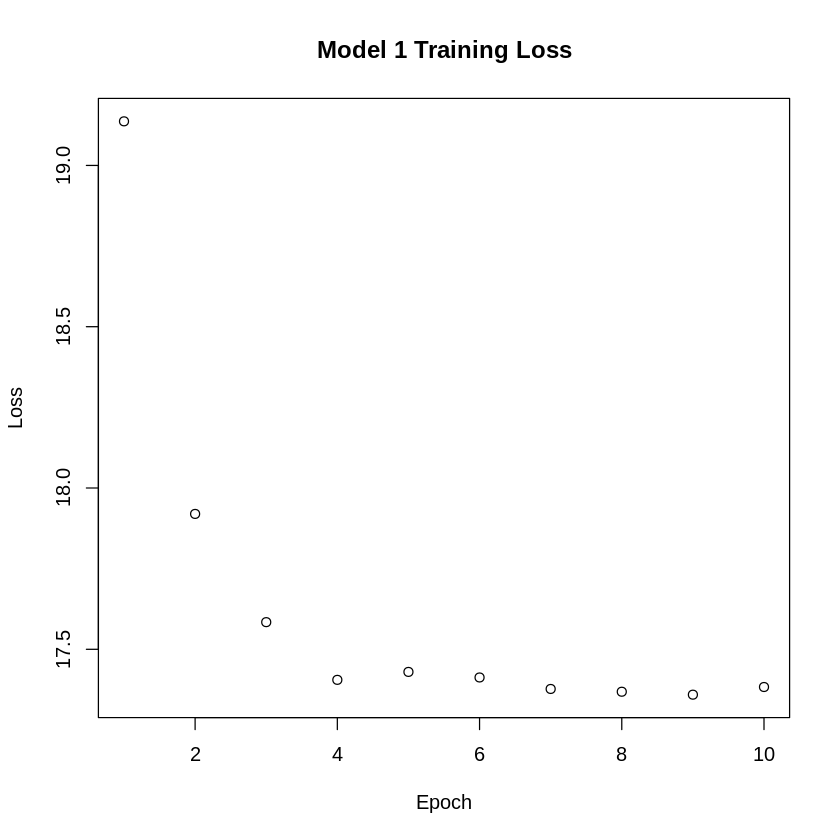

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

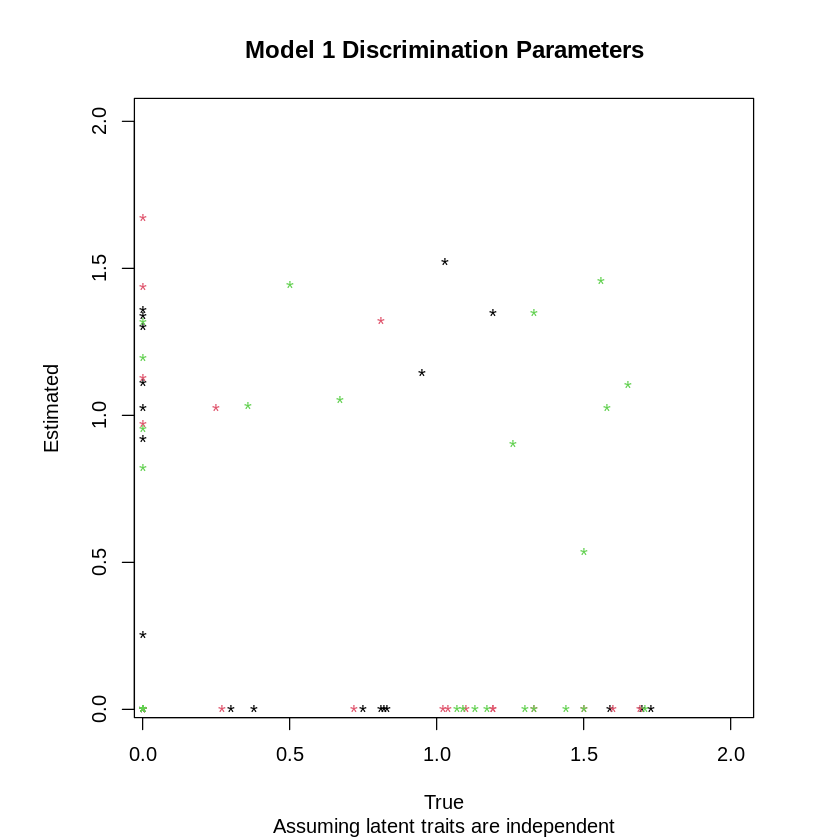

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

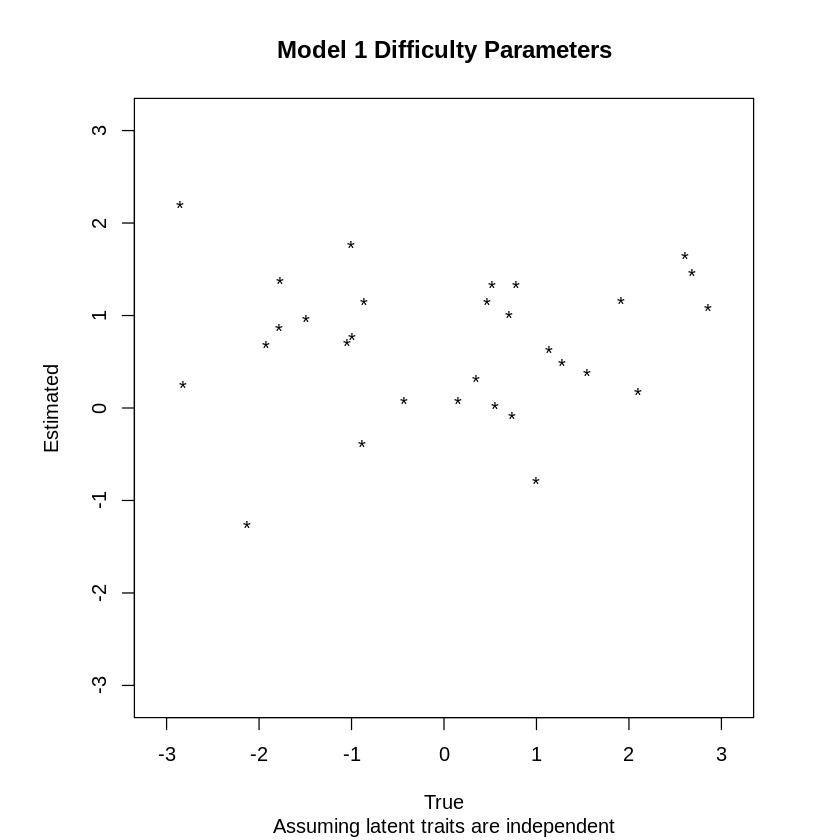

In [ ]:
# Difficulty parameter 
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

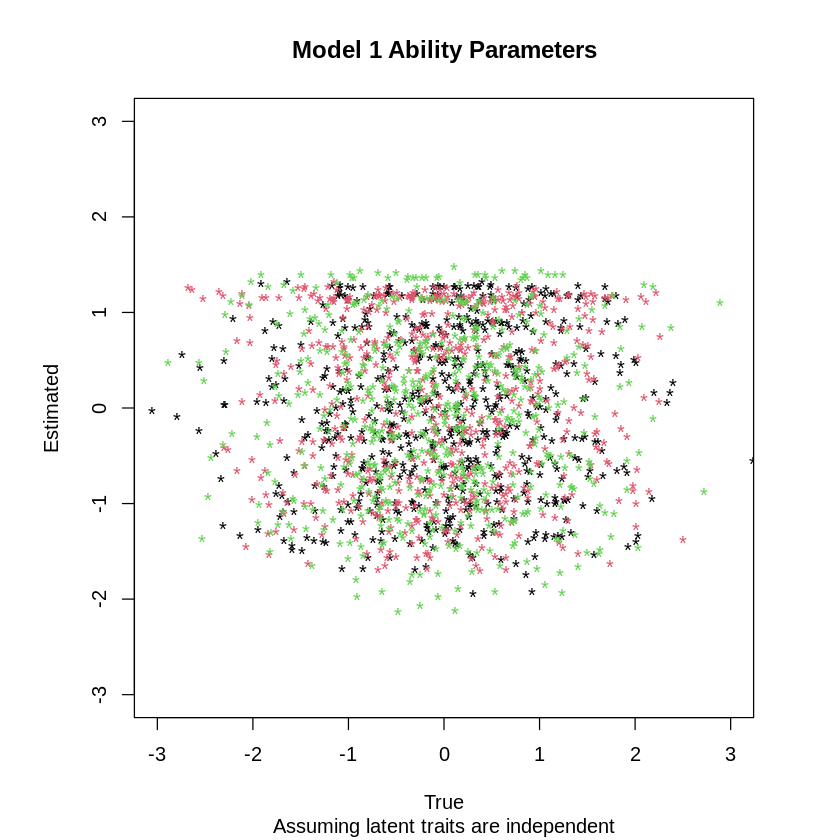

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')